In [18]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

#Generate training data

## first generate 10 cluster means for each class:

(-4, 4)

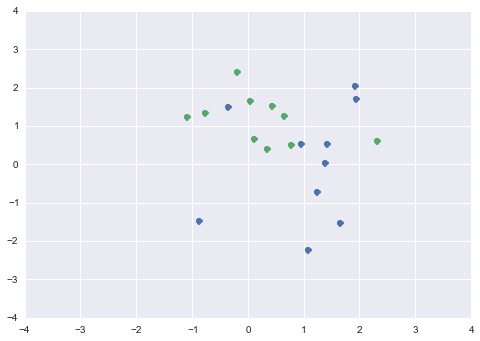

In [19]:
cov = np.identity(2)

#generate blue class:
#    generate m_1, ..., m_10 from N((1,0), I)
mean = [1,0]
blue_m = np.random.multivariate_normal(mean,cov,10)

#generate green class:
#    generate m_1, ..., m_10 from N((0,1), I)
mean = [0,1]
green_m = np.random.multivariate_normal(mean,cov,10)

plt.plot(green_m[:,0],green_m[:,1], 'o', color='g')
plt.plot(blue_m[:,0],blue_m[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

## now generate the training data based on the centers

(-4, 4)

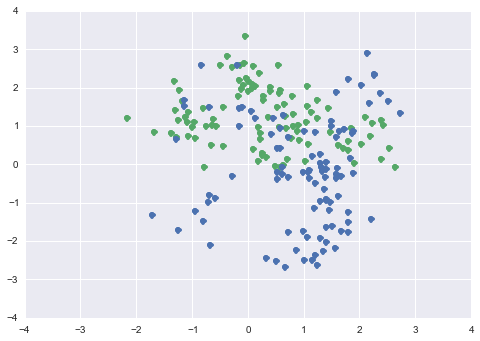

In [20]:
#greens:
greens = []
for i in range(100):
    cur_mean = green_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    greens.append(new_point[0])
    
greens = np.array(greens)
plt.plot(greens[:,0],greens[:,1], 'o', color='g')

blues = []
for i in range(100):
    cur_mean = blue_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    blues.append(new_point[0])
    
blues = np.array(blues)
plt.plot(blues[:,0],blues[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#LINEAR REGRESSION

###reshape the training data

In [21]:
x_train = np.append(blues, greens)
x_train = x_train.reshape((200,2))
# add column of ones
ones = np.ones(200).reshape((200,1))

x_train = np.append(ones, x_train, axis=1)

y_train = np.append(np.zeros(100), np.ones(100)).reshape((200,1))

##find paramters $\beta$ using normal equation $\beta = (X^TX)^{-1}X^Ty$

In [22]:
from numpy.linalg import inv

x_trans = np.transpose(x_train)
beta = np.dot(np.dot(inv(np.dot(x_trans, x_train)), x_trans), y_train)
print beta

[[ 0.46265537]
 [-0.09232068]
 [ 0.17945639]]


##generate some test data

In [23]:
x_test = np.array([0,0,0])
for x in np.linspace(-4, 4, 50):
    for y in np.linspace(-4, 4, 50):
        x_test = np.vstack((x_test, np.array([1,x,y])))
        
x_test = x_test[1:]


y_test = np.dot(x_test, beta)

##Plot the predictions

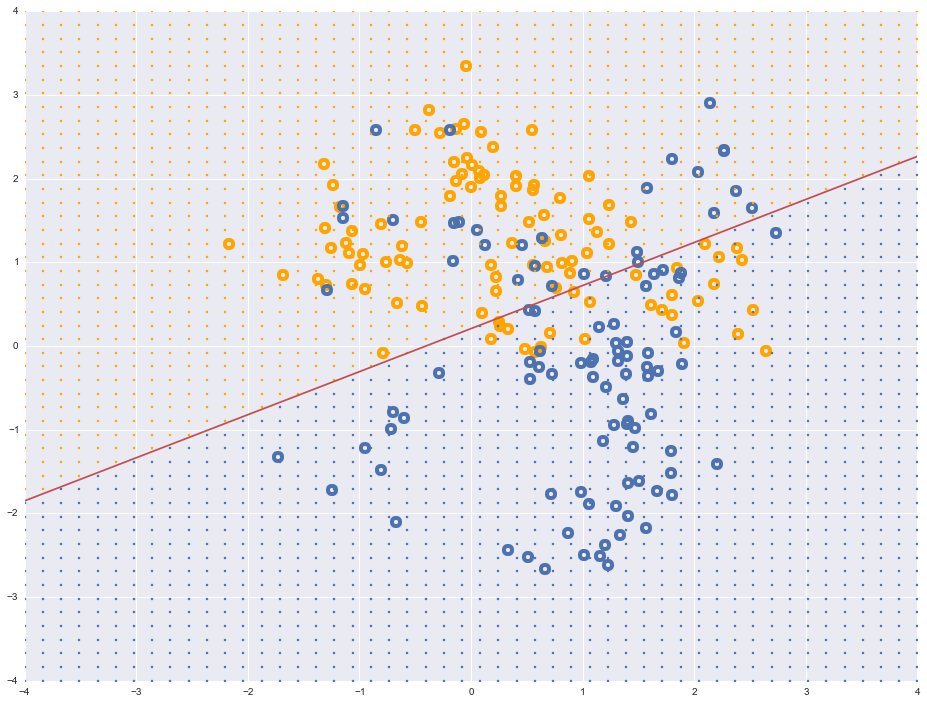

In [24]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_test):
    if y<0.5:
        ax.plot(x[1], x[2], '.', color='b', markersize=5)
    else:
        ax.plot(x[1], x[2], '.', color='orange', markersize=5)
        
        
#plot the regression line

#0.5 = b_0 + (-4)b_1 + yb_2
#y=(0.5-b_0 + 4b_1)/b_2
p1 = (0.5-beta[0][0] + 4*beta[1][0])/beta[2][0]
p2 = (0.5-beta[0][0] - 4*beta[1][0])/beta[2][0]


#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='r')
ax.add_line(line)

#K-nearest Neighbours

In [25]:
def knearest(point, xs, k):
    #remove last column, containing class labels
    cleaned = np.delete(xs, -1, 1)
    #print point
    #print cleaned
    
    distances = (np.sum((point - cleaned)**2, axis=1))**0.5
    #print distances
    idxs = np.argsort(distances)[0:k]
    return xs[idxs]

In [26]:
x_train = np.append(blues, greens).reshape((200,2))

y_train = np.append(np.zeros(100), np.ones(100)).reshape((200,1))

#last column contains class
all_train = np.hstack((x_train, y_train))


In [27]:
(-4)

-4

In [28]:
point = np.array([-4,4])
xs = np.array([[  1.35916311e+00,  -3.18849172e-01], [ -1.33181071e-01,   6.97607273e-01]])
(np.sum(point - xs, axis=1))**2

array([ 1.08225309,  0.31857694])

In [31]:
k=5

x_test = np.array([0,0])
for x in np.linspace(-4, 4,151):
    for y in np.linspace(-4, 4, 151):
        x_test = np.vstack((x_test, np.array([x,y])))
        
x_test = x_test[1:]

y_test = []

for x in x_test:
    neighbours = knearest(x, all_train, k)
    vote = np.sum(neighbours[:,-1])
    if vote/k > 0.5:
        y_test.append(1)
    else:
        y_test.append(0)

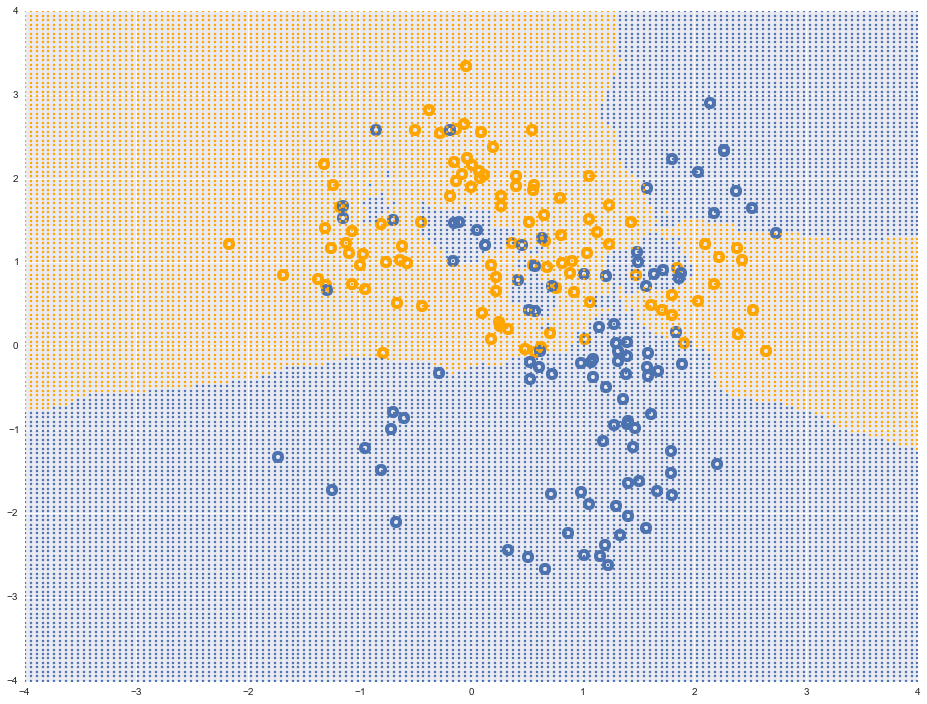

In [32]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_test):
    if y<0.5:
        ax.plot(x[0], x[1], '.', color='b', markersize=5)
    else:
        ax.plot(x[0], x[1], '.', color='orange', markersize=5)
        
        
